<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение общей информации</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий--вывод" data-toc-modified-id="Общий--вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий  вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель со значением *F1*-меры 0.59.

Дополнительно измерим *AUC-ROC*, сравнив её значение с *F1*-мерой.

# Описание данных

**Признаки:**
* `RowNumber` — индекс строки в данных
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — сколько лет человек является клиентом банка
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата

**Целевой признак:**
* `Exited` — факт ухода клиента

## Подготовка данных

### Изучение общей информации

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import time

Прочитаем и выведем первые 5 строк наших данных.

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Посмотрим общую информацию.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Итак, в таблице 13 признаков и целевой признак. Тип данных у признаков - `object`, `float64` и `int64`.

Признаки:

* `RowNumber` — индекс строки в данных
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — сколько лет человек является клиентом банка
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата

Целевой признак:

* `Exited` — факт ухода клиента

#### Вывод

У признака `Tenure` пропущены несколько объектов. Поскольку признак `Tenure` не сильно зависит от имеющихся признаков, то просто заполним значение пропущенных объектов нулем. 

Некторые признаки в нашей таблице не влияют на результат нашего исследования, поэтому можно их просто удалить.

Предварительно можно сказать, что данных достаточно для исследования. Перед началом работы необходимо провести предобработку данных. 

### Предобработка данных

Заполним пропуски у признака `Tenure` нулем.

In [5]:
data['Tenure']=data['Tenure'].fillna(0).astype('int64')

Удалим те признаки которые не повлияют на результат исследования. 

In [6]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Посмотрим еще раз на общую информацию.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#### Вывод

После предобработки количество признаков составило 10. Теперь можно приступить к исследованию.

## Исследование задачи

Построим гистограмму оставшихся и ушедших клиентов. 

<AxesSubplot:>

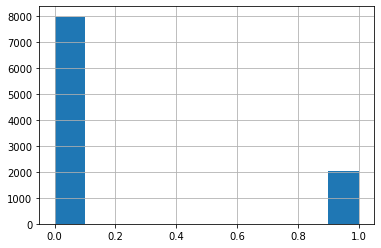

In [8]:
data['Exited'].hist(bins=10)

Соотношение ушедших к оставшимся клиентов составляет 1:4. Можно сказать что у нас наблюдается дисбаланс классов.

Преобразуем категориальные признаки в численные техникой прямого кодирования. 

In [9]:
data_ohe = pd.get_dummies(data, drop_first=True)

target = data_ohe['Exited'] # переменная признаков
features = data_ohe.drop(['Exited'], axis=1) # переменная целевого признака

Разделим данные на обучающую, валидационную и тестовую в соотношении 3:1:1 соответственно.

In [10]:
# для начала разделим исходые данные на обучающую и валидационную
df_train, df_valid = train_test_split(data_ohe, test_size=0.4, random_state=123)
# а затем валидационную выборку пополам, на валидационную и тестовую
df_valid, df_test = train_test_split(df_valid, test_size=0.5, random_state=123)

In [11]:
# обучающие переменные
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']
# валидационные переменные 
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']
# тестовые переменные
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

In [12]:
pd.Series([features_train.shape,  target_train.shape,  features_valid.shape
          , target_valid.shape, features_test.shape, target_test.shape])

0    (6000, 11)
1       (6000,)
2    (2000, 11)
3       (2000,)
4    (2000, 11)
5       (2000,)
dtype: object

Размеры разделенных данных соответсвует соотношению.

Приведем признаки к одному масштабу.

In [14]:
pd.options.mode.chained_assignment = None # чтобы не было ошибки работы

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


Построим модель без учета дисбаланам классов.

###### Дерево решения

С помощью цикла найдем глубину дерева с лучшим зачением F1-меры.

In [15]:
startTime_1 = time.time()

best_f1_scor_1 = 0
best_depth = None

for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train) # обучим модель на обучающей выборке
    predictions = model.predict(features_valid) # предскажем ответы 
    f1_scor = f1_score(target_valid, predictions) # посчитаем F1-меру
    if f1_scor > best_f1_scor_1:
        best_f1_scor_1 = f1_scor # сохраним лучшее значение F1-меры
        best_depth = depth # сохраним глубину дерева для лучшего значения F1-меры
print(f'Лучшее значение F1-меры равно {best_f1_scor_1:.3} при глубине дерева {best_depth}.')

endTime_1 = time.time()
totalTime_1 = endTime_1 - startTime_1
print(f"Время, затраченное на выполнение данного кода {totalTime_1:.3}")

Лучшее значение F1-меры равно 0.57 при глубине дерева 7.
Время, затраченное на выполнение данного кода 0.467


###### Случайный лес

Сначала циклом найдем глубину дерева с лучшим значением F1-меры, а затем найдем при лучшей глубине дерева количество деревьев с лучшим значение F1-меры. 

In [16]:
startTime_2 = time.time()

best_f1_scor_2 = 0
best_depth = None
best_est = None

for est in range(80, 140, 5):
    for depth in range(2, 16, 2):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train) 
        predictions = model.predict(features_valid)
        f1_scor = f1_score(target_valid, predictions)
        if f1_scor > best_f1_scor_2:
            best_f1_scor_2 = f1_scor 
            best_depth = depth
            best_est = est
            
print(f'Лучшее значение F1-меры равно {best_f1_scor_2:.3} при глубине дерева {best_depth} и при количестве деревьев {best_est}.')         

endTime_2 = time.time()
totalTime_2 = endTime_2 - startTime_2
print(f"Время, затраченное на выполнение данного кода {totalTime_2:.3}")

Лучшее значение F1-меры равно 0.58 при глубине дерева 12 и при количестве деревьев 115.
Время, затраченное на выполнение данного кода 48.0


###### Логистическая регрессия

In [17]:
startTime_3 = time.time()

best_f1_scor_3 = 0
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
best_f1_scor_3 = f1_score(target_valid, predictions)

print(f'Лучшее значение F1-меры равно {best_f1_scor_3:.3}.')

endTime_3 = time.time()
totalTime_3 = endTime_3 - startTime_3
print(f"Время, затраченное на выполнение данного кода {totalTime_3:.3}")

Лучшее значение F1-меры равно 0.285.
Время, затраченное на выполнение данного кода 0.0956


#### Вывод

Оценим качество модели по F1-мера и скорости работы без учета дисбаланса классов.
* F1-мера. 
Самое высокое значение у случайного леса: вместо одного решающего дерева используется целый оркестр.
На втором месте — решающее дерево. Самое низкое качество предсказания у логистической регрессии.
* Скорость работы. 
Высокая скорость работы у логистической регрессии: у неё меньше всего параметров.
Скорость решающего дерева тоже высокая и зависит от глубины. Случайный лес медленнее всех: чем больше деревьев, тем неторопливее работает модель.

Объединим критерии в таблицу:

In [18]:
pd.DataFrame({'F1-мера': [f'{best_f1_scor_1:.3}', f'{best_f1_scor_2:.3}', f'{best_f1_scor_3:.3}']
              , 'Скорость (сек)': [f'{totalTime_1:.3}', f'{totalTime_2:.3}', f'{totalTime_3:.3}']}
             , index=['Решающее дерево', 'Случайный лес', 'Логистическая регрессия'])

,F1-мера,Скорость (сек)
Решающее дерево,0.57,0.467
Случайный лес,0.58,48.0
Логистическая регрессия,0.285,0.0956


## Борьба с дисбалансом

###### Увеличим выборки техникой upsampling.

In [19]:
def upsample(features, target, repeat):
    # разделим обучающую выборку на отрицательные и положительные объекты
    features_zeros = features[target == 0] 
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    # продублируем объекты положительного класса и объединим их с объектами отрицательного класса
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    # перемешаем данные
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled
# вызовем функцию для обучающих данных
features_upsampled, target_upsampled = upsample(features_train, target_train, 4) 

После увеличеня выборки построим модель с учетом дисбаланса классов.

###### Дерево решения

In [20]:
startTime_4 = time.time()

best_f1_scor_4 = 0
best_depth = None

for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_upsampled, target_upsampled) 
    predictions = model.predict(features_valid)
    f1_scor = f1_score(target_valid, predictions) 
    if f1_scor > best_f1_scor_4:
        best_f1_scor_4 = f1_scor
        best_depth = depth 
        
print(f'Лучшее значение F1-меры равно {best_f1_scor_4:.3} при глубине дерева {best_depth}.')

endTime_4 = time.time()
totalTime_4 = endTime_4 - startTime_4
print(f"Время, затраченное на выполнение данного кода {totalTime_4:.3}")

Лучшее значение F1-меры равно 0.576 при глубине дерева 8.
Время, затраченное на выполнение данного кода 0.617


###### Случайный лес

In [21]:
startTime_5 = time.time()

best_f1_scor_5 = 0
best_depth = None
best_est = None

for est in range(80, 140, 5):
    for depth in range(2, 16, 2):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_upsampled, target_upsampled) 
        predictions = model.predict(features_valid)
        f1_scor = f1_score(target_valid, predictions)
        if f1_scor > best_f1_scor_5:
            best_f1_scor_5 = f1_scor 
            best_est = est
            best_depth = depth
            
print(f'Лучшее значение F1-меры равно {best_f1_scor_5:.3} при глубине дерева {best_depth} и при количестве деревьев {best_est}.')

endTime_5 = time.time()
totalTime_5 = endTime_5 - startTime_5
print(f"Время, затраченное на выполнение данного кода {totalTime_5:.3}")

Лучшее значение F1-меры равно 0.628 при глубине дерева 10 и при количестве деревьев 110.
Время, затраченное на выполнение данного кода 65.2


###### Логистическая регрессия

In [22]:
startTime_6 = time.time()

best_f1_scor_6 = 0
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_valid)
best_f1_scor_6 = f1_score(target_valid, predictions)

print(f'Лучшее значение F1-меры равно {best_f1_scor_6:.3}.')

endTime_6 = time.time()
totalTime_6 = endTime_6 - startTime_6
print(f"Время, затраченное на выполнение данного кода {totalTime_6:.3}")

Лучшее значение F1-меры равно 0.462.
Время, затраченное на выполнение данного кода 0.0263


###### Уменьшим  выборки техникой downsampling.

In [23]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

После уменьшения выборки построим модель с учетом дисбаланса классов.

###### Дерево решения

In [24]:
startTime_7 = time.time()

best_f1_scor_7 = 0
best_depth = None

for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_downsampled, target_downsampled) 
    predictions = model.predict(features_valid)
    f1_scor = f1_score(target_valid, predictions) 
    if f1_scor > best_f1_scor_7:
        best_f1_scor_7 = f1_scor
        best_depth = depth 
        
print(f'Лучшее значение F1-меры равно {best_f1_scor_7:.3} при глубине дерева {best_depth}.')

endTime_7 = time.time()
totalTime_7 = endTime_7 - startTime_7
print(f"Время, затраченное на выполнение данного кода {totalTime_7:.3}")

Лучшее значение F1-меры равно 0.561 при глубине дерева 5.
Время, затраченное на выполнение данного кода 0.252


###### Случайный лес

In [25]:
startTime_8 = time.time()

best_f1_scor_8 = 0
best_depth = None
best_est = None 

for est in range(80, 140, 5):
    for depth in range(2, 16, 2):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_downsampled, target_downsampled)  
        predictions = model.predict(features_valid)
        f1_scor = f1_score(target_valid, predictions)
        if f1_scor > best_f1_scor_8:
            best_f1_scor_8 = f1_scor  
            best_depth = depth
            best_est = est
            
print(f'Лучшее значение F1-меры равно {best_f1_scor_8:.3} при глубине дерева {best_depth} и при количестве деревьев {best_est}.')

endTime_8 = time.time()
totalTime_8 = endTime_8 - startTime_8
print(f"Время, затраченное на выполнение данного кода {totalTime_8:.3}")

Лучшее значение F1-меры равно 0.621 при глубине дерева 10 и при количестве деревьев 110.
Время, затраченное на выполнение данного кода 27.3


###### Логистическая регрессия

In [26]:
startTime_9 = time.time()

best_f1_scor_9 = 0
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predictions = model.predict(features_valid)
best_f1_scor_9 = f1_score(target_valid, predictions)

print(f'Лучшее значение F1-меры равно {best_f1_scor_9:.3}.')

endTime_9 = time.time()
totalTime_9 = endTime_9 - startTime_9
print(f"Время, затраченное на выполнение данного кода {totalTime_9:.3}")

Лучшее значение F1-меры равно 0.465.
Время, затраченное на выполнение данного кода 0.0149


#### Вывод

Качество моделей при технике увеличения выборки больше чем при технике уменьшения выборки, кроме логистической регрессии, качество которой больше при уменьшении выборки. В дальнейшем используем увеличенные обучющие выборки.  

Объединим критерии в таблицу:

In [27]:
pd.DataFrame({'F1-мера': [f'{best_f1_scor_4:.3}', f'{best_f1_scor_5:.3}', f'{best_f1_scor_6:.3}'
                           , f'{best_f1_scor_7:.3}', f'{best_f1_scor_8:.3}', f'{best_f1_scor_9:.3}']
              , 'Скорость (сек)': [f'{totalTime_4:.3}', f'{totalTime_5:.3}', f'{totalTime_6:.3}'
                                  , f'{totalTime_7:.3}', f'{totalTime_8:.3}', f'{totalTime_9:.3}']}
             , index=[['upsampling', 'upsampling', 'upsampling', 'downsampling', 'downsampling', 'downsampling'], ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия'
                        , 'Решающее дерево', 'Случайный лес', 'Логистическая регрессия']])

F1-мера Скорость (сек)
upsampling   Решающее дерево           0.576          0.617
             Случайный лес             0.628           65.2
             Логистическая регрессия   0.462         0.0263
downsampling Решающее дерево           0.561          0.252
             Случайный лес             0.621           27.3
             Логистическая регрессия   0.465         0.0149

## Тестирование модели

Посчитаем качество модели с учетом увеличенной выборки. Лучшее качество показала модель **случайный лес**. Его и проверим на тестовой выборке. 

###### Случайный лес

In [28]:
startTime_10 = time.time()

best_f1_scor_10 = 0

model_forest = RandomForestClassifier(n_estimators=110, max_depth=10, random_state=12345)
model_forest.fit(features_upsampled, target_upsampled)
predictions = model_forest.predict(features_test) 
best_f1_scor_10 = f1_score(target_test, predictions)
            
print(f'Значение F1-меры равно {best_f1_scor_10:.3}.')

endTime_10 = time.time()
totalTime_10 = endTime_10 - startTime_10
print(f"Время, затраченное на выполнение данного кода {totalTime_10:.3}")

Значение F1-меры равно 0.626.
Время, затраченное на выполнение данного кода 0.959


###### Исследуем метрику **AUC-ROC**.

Для **случайного леса**.

In [29]:
probabilities_test_forest = model_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test_forest[:, 1]
fpr_forest, tpr_forest, thresholds = roc_curve(target_test, probabilities_one_test)

roc_auc_forest = roc_auc_score(target_test, probabilities_one_test)
print(f'AUC-ROC для случайного леса {roc_auc_forest:.3}.')

AUC-ROC для случайного леса 0.866.


Построим ROC-кривую для нашей модели. 

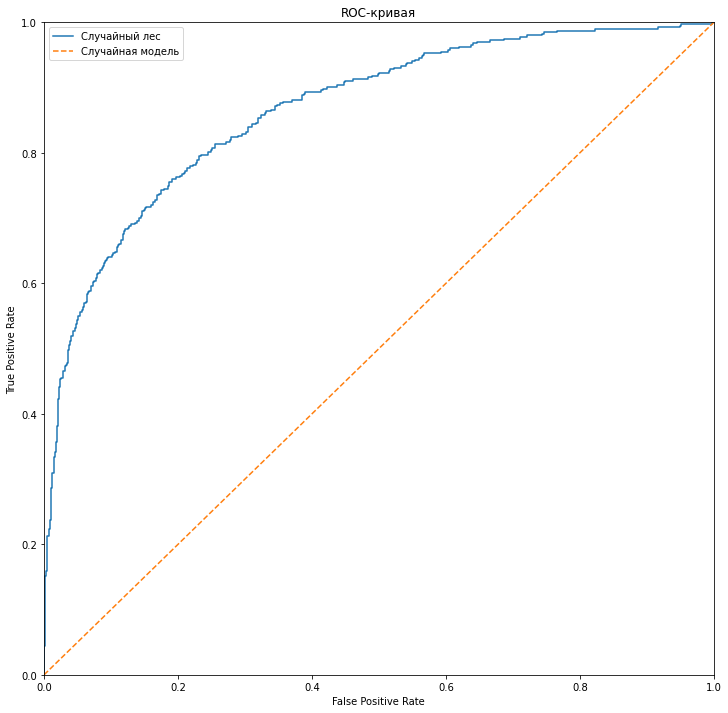

In [30]:
plt.figure(figsize=(12, 12))
plt.plot(fpr_forest, tpr_forest, label='Случайный лес')
plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend()

plt.show()

При построении ROC кривой получили типовой график, который показал **случайный лес**. Качество **AUC-ROC** больше **F-меры**. 

## Общий  вывод

###### Общая таблица

In [31]:
pd.DataFrame({'F1-мера': [f'{best_f1_scor_1:.3}', f'{best_f1_scor_2:.3}', f'{best_f1_scor_3:.3}'
                           , f'{best_f1_scor_10:.3}']
              , 'AUC-ROC': ['-', '-', '-'
                            , f'{roc_auc_forest:.3}']}
             , index=[['Без учета дисбаланса', 'Без учета дисбаланса', 'Без учета дисбаланса'
                       , 'С учетом дисбаланса']
                      , ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия'
                        , 'Случайный лес']])

F1-мера AUC-ROC
Без учета дисбаланса Решающее дерево            0.57       -
                     Случайный лес              0.58       -
                     Логистическая регрессия   0.285       -
С учетом дисбаланса  Случайный лес             0.626   0.866

Цель исследования - построить модель с метрикой **F1-мера** до 0.59, была достигнута. Отношение оттока клиентов к оставшимся составляет 1:4. Это дисбаланс классов. 

Картина распределения "мест" моделей по метрике **F1-меры** с учетом и без учета дисбаланса похожая. Самое высокое значение у **случайного леса**. На втором месте — **решающее дерево**. Самое низкое качество предсказания у **логистической регрессии**. Если говорить про лучшую модель, а именно **случайный лес**, то для него такие относительно высокие значения получились при глубине дерева - 10, и при количестве деревьев - 110.

Высокая скорость работы у **логистической регрессии**. Скорость **решающего дерева** тоже высокая и зависит от глубины. **Случайный лес** медленнее всех: чем больше деревьев, тем неторопливее работает модель.

Сравнение значений качества метрик приведено к общей таблице(см.выше).